(morphometrie-chapitre)=
# Analyses morphométriques

<table>
  <tr>
    <td align="center">
      <a href="https://github.com/eddyfortier">
        <img src="https://avatars.githubusercontent.com/u/72314243?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Eddy Fortier</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
    </td>
    <td align="center">
      <a href="https://github.com/pbellec">
        <img src="https://avatars.githubusercontent.com/u/1670887?v=4?s=100" width="100px;" alt=""/>
        <br /><sub><b>Pierre bellec</b></sub>
      </a>
      <br />
        <a title="Contenu">🤔</a>
    </td>
  </tr>
</table>

```{warning}
Ce chapitre est en cours de développement. Il se peut que l'information soit incomplète, ou sujette à changement.
```

## Objectifs du cours

Ce troisième chapitre introduit différentes approches utilisées afin de modéliser et d'exploiter les données acquises grâce aux techniques d'imagerie par résonance magnétique anatomique vues lors du cours 2.
Tout d'abord, on y survolera des approches basées sur l'analyse de **volumes** telles que la **volumétrie manuelle** et l'**approche par voxel (*voxel-based morphometry* ou VBM)**.
On tente par ce type d'analyse d'identifier et/ou de délimiter différentes aires du cerveau.
Ce processus rendra par la suite possible l'étude des tissus présents dans ces différentes segmentations/unités de volume.
Il sera ensuite question de l'utilisation du **recalage** et du **contrôle de qualité** dans le traitement des données d'imagerie.
Nous terminerons cette séance avec une famille d'approches permettant l'étude de l'épaisseur corticale: les **analyses de surface**.

## Morphométrie

En neurosciences, la **morphométrie** est l'étude de la forme du cerveau et de ses structures.
Le terme morphométrie vient de deux termes tirés du grec ancien: *morphos* (forme) et *métron* (mesure).
La morphométrie est donc la "mesure" de la "forme".
Cette discipline se concentre sur la caractérisation des dimensions et des formes des différentes structures d'intérêt.
Pour ce faire, il est nécessaire de pouvoir observer clairement les délimitations de ces structures.
L'utilisation de ce genre de technique permet aussi de faire des comparaisons inter-individuelles.
On pourrait en effet vouloir comparer les variations dans la forme de divers structures à travers les cerveaux de différentes personnes.
De telles comparaisons peuvent être informatrices au niveau du stade développemental d'un sujet, ou même, de la présence de certaines lésions ou pathologies.

## Volumétrie manuelle

In [1]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/CzsZdtqBmCg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

La **volumétrie manuelle** est une approche qui peut sembler assez simple a priori, mais qui nécessite du temps et un protocol rigoureux ayant des critères de segmentation clairs.
Cette façon de faire est essentielle afin d'assurer une segmentation logique, un bon niveau de reproductibilité des résultats et un accord inter-juge acceptable.
La procédure nécessitera l'utilisation d'un logiciel permettant de dessiner les "frontières" de chacune des aires que l'on veut pouvoir identifier sur les images obtenues lors du scan d'un cerveau.
On commencera d'abord par identifier ce contour sur chaque coupe où la structure est présente dans un premier plan (par exemple, sur une coupe axiale), puis il faudra aller corriger cette délimitation sur chaque coupe prise dans un second plan (comme une coupe sagitale) et finalement, répéter de nouveau cette correction sur le troisième plan (une coupe coronale).

> Pour un rappel concernant termes et les différents types de coupes du cerveau, veuillez vous référer au [Chapitre 1: Cartes cérébrales](https://psy3018.github.io/cartes_cerebrales.html#irm-structurelle).

Le processus nécessaire à l'obtention d'une segmentation finale précise d'une structure unique peut donc être très long et ardu.
Il devra d'ailleurs être répété de nouveau pour chaque nouvelle structure d'intérêt.

```{admonition} Un mot sur l'utilisation d'atlas de segmentation
:class: info
:name: atlas-info
Afin de faciliter la standardisation de la segmentation, il est possible d'utiliser des cartes préétablies par des équipes de chercheurs.
On appelle ces cartes des **atlas de segmentation**.
Ceux-ci sont développés par des équipes de scientifiques afin de permettre une segmentation robuste de certaines structures d'intérêt.
Comme il existe une variété d'atlas permettant de rencontrer divers besoin en terme de segmentaton, il est important de choisir adéquatement celui qui sera utilisé en fonction des structures particulières que vous voulez étudier.
```

NameError: name 'fig' is not defined

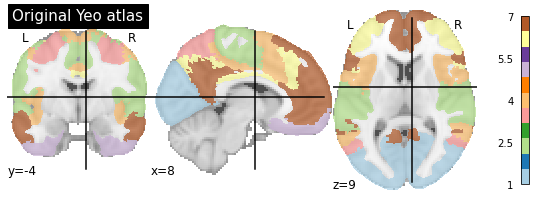

In [2]:
# Téléchargement de l'atlas de Yeo (2011)
from nilearn import datasets

atlas_yeo_2011 = datasets.fetch_atlas_yeo_2011()
atlas_yeo = atlas_yeo_2011.thick_7

# Visualisation de la figure
from myst_nb import glue
from nilearn import plotting

plotting.plot_roi(atlas_yeo,
                  title = 'Original Yeo atlas',
                  cut_coords = (8, -4, 9),
                  colorbar = True,
                  cmap = 'Paired')

glue("atlas1-fig", fig, display=False)

```{glue:figure} atlas1-fig
:figwidth: 800px
:name: "atlas1-fig"

Un exemple de segmentation utilisant l'atlas de Yeo (2011), sur trois plans de coupes: coronal (gauche), sagital (milieu) et axial (droite).
Voir l'astuce {ref}`Naviguer les coupes du cerveau<coupes-tip>` pour une explication de ces termes.
Cette figure est générée par du code python à l'aide de la librairie [nilearn](nilearn.github.io/) à partir d'un jeu de données publique appelé fetch_atlas_yeo_2011 **CITATION À AJOUTER** (cliquer sur + pour voir le code).
```


## Approche par voxel (*Voxel-based morphometry*)

In [ ]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/yyUKkPaG3Q8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

L'**approche par voxel**, aussi mieux connue sous le nom de ***voxel-based morphometry*** (ou **VBM**), est une autre approche qu'il est possible d'employer afin de segmenter différentes aires d'intérêt du cerveau.
Son objectif est de mesurer la densité de matière grise à l'intérieur et immédiatement autour d'un voxel donné.
Cette approche est donc moins limitée par le besoin d'avoir des frontières préétablies claires entre les différentes structures à l'étude.
Lorsque répétée pour l'entièreté du volume du cerveau, on peut obtenir une carte tridimensionnelle de la densité de matière grise à travers celui-ci.
L'avantage premier de cette approche est son économie au niveau du temps nécessaire à un.e chercheur.e pour l'étape de la segmentation.
En effet, comme cette technique présente une approche de segmentation automatisée, la présence d'une personne externe ne devient nécessaire que lors de l'étape de la vérification de la segmentation.
Par contre, cette approche ayant une quantité importante de points de mesure (liés à chaque voxel étudié), elle pose aussi un sérieux problème de **comparaisons multiples** lorsque vient le temps de faire les analyses statistiques.

> Les particularités des analyses statistiques en neuroimagerie seront vues en détail lors du [Chapitre 6: Régression linéaire](https://psy3018.github.io/regression.html).
>
> Les particularités des corrections à apporter lors de ces analyses statistiques seront vues en détail lors du [Chapitre 10: Cartes statistiques](https://psy3018.github.io/cartes_statistiques.html).

Le traitement des données en VBM suit un processus en quatre étapes:
1. La segmentation
2. Le recalage dans un espace stéréotaxique de référence
3. Le lissage spatial
4. Les analyses statistiques

La **segmentation** est la première étape de la séquence.
Dans le contexte de la VBM, qui est une analyse de la matière grise, l'objectif principal de cette étape est de déterminer s'il y a de la matière grise dans chacun des voxels.
Un des types de segmentation automatisée qu'il est possible d'utiliser pour obtenir cette information est la segmentation probabiliste.
Dans ce genre d'algorithme, on essaie d'attribuer une étiquette concernant le contenu du voxel (air autour de la tête, liquide céphalo-rachidien, matière grise, matière blanche, etc.).
Pour ce faire, on établit la probabilité que la valeur du voxel appartienne à l'une ou l'autre des catégories possibles.
La segmentation retournera donc une carte des voxels contenant probablement de la matière grise.
Il est en effet possible que la segmentation automatique nous retourne certains autres tissus non-désirés, mais dont les valeurs étant similaires à celle de la matière grise, ne sont pas distinguées par l'algorithme de segmentation.
Il est aussi possible que des voxels se trouvant directement sur la jonction entre une zone blanche et une zone noire (par exemple, sur une paroi de matière blanche qui borderait un ventricule) aient comme valeur résultante une valeur s'apparentant plutôt au gris associé à la matière grise (valeur moyenne entre blanc et noir).
On appelle ce genre d'effet de mélange de noir et de blanc les volumes partiels (une partie du volume du voxel est blanche alors que l'autre partie est noire).
- Ce genre d'erreur est une source possible de **faux positifs**.

Il est aussi possible de perdre certaines structures pour lequelles le contraste entre matière blanche et matière grise ne seraient pas assez important pour que l'algorithme réussisse à les classer efficacement.
Pour ce genre de structure, il est important d'ajouter des a priori (des règles/conditions supplémentaires) dans notre algorithme de traitement afin de ne pas les perdre.
Il est aussi envisageable d'effectuer cette partie de la segmentation de façon manuelle.
- Ce genre d'erreur est une source possible de **faux négatifs**.

La seconde étape est l'étape du **recalage dans un espace stéréotaxique de référence** (*coregistration* en anglais).
Celle-ci sert à pouvoir mettre en relation les différents voxels à travers différents sujets (nécessaire pour les analyses statistiques).
Contrairement à la volumétrie manuelle où chaque volume à l'étude est délimité de façon à représenter la même structure d'intérêt, ni plus, ni moins, lorsque l'on fait une analyse en VBM, les unités de volume (voxels) que nous obtenons ne sont pas liées à une structure particulière.
En fonction de différentes sources de variation (par exemple: la position de la tête du sujet durant l'acquisition, la variabilité interindividuelle, etc.), un voxel *x* peut se retrouver dans des structures différentes lorsque l'on compare deux sujets.
Il faut donc que l'on procède à cette étape afin de créer une concordance des différents voxels à travers les sujets à l'étude.
L'espace stéréotaxique de référence que l'on crée ainsi est donc un système de référence sur lequel on réaligne les données de chaque sujet afin de permettre ces comparaisons.
Ainsi, on s'assure que lorsque l'on observe une coupe particulière du cerveau de différents participants, on observe aussi les mêmes structures.

> Les détails concernant l'étape du recalage seront présentés plus en détail plus loin dans le [présent chapitre](https://psy3018.github.io/morphometrie.html#recalage-d-images).

L'étape suivante correspond au **lissage spatial** (aussi appelée convolution spatiale).
Le lissage s'apparente à ajouter un filtre sur l'image la rendant plus floue.
Il est nécessaire de procéder à cette étape afin d'obtenir des valeurs de densité de matière grise pour des zones qui dépasse le voxel unique.
Comme l'objectif de notre carte de densité de matière grise est de pouvoir observer des densités locales contenant des groupes (voisinages) de voxels, il est plus facile de procéder à ce genre d'observation après l'étape du lissage spatial.
Lors de cette opération, on remplace la valeur obtenue pour le voxel *x* par une moyenne pondérée par une distribution gaussienne des valeurs de ce voxel et des voxels avoisinants.
Comme c'est une moyenne pondérée, la valeur originale du voxel est celle qui aura la plus grande pondération, mais les valeurs des voxels situés directement autour vont aussi l'affecter grandement.
Mais plus on s'éloigne du voxel d'intérêt *x*, moins les autres voxels influencent sa valeur.
Afin de savoir jusqu'à quel point on s'éloignera du voxel *x* pour calculer la valeur lissée, il nous faudra un autre paramètre: le FWHM (*full width at half maximum*).
- Il est important de ne pas confondre cette valeur avec l'écart-type.

Plus la valeur de FWHM est grande, plus grand sera le rayon du voisinage de voxels qui auront un impact sur la valeur lissée du voxel *x*.

> Les détails concernant l'étape du lissage spatial seront présentés plus en détail lors du [Chapitre 4: IRM fonctionnelle](https://psy3018.github.io/irm_fonctionnelle.html#pretraitement-des-donnees-d-irmf).

L'ultime étape de ce processus est celle des **analyses statistiques**.
C'est lors de cette étape que l'on parvient à obtenir les cartes finales avec lesquelles il est possible de procéder aux analyses et de tirer les observations et conclusions d'une étude en morphométrie.
On y superpose à l'image de l'espace stéréotaxique de référence les valeurs obtenues pour les régions où des informations d'intérêt statistique pour le protocol de recherche ont été obtenues.
C'est généralement le genre d'image qui sera par la suite utilisé lors de publications scientifiques.

## Recalage d'images

In [ ]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/VYN4K-K-Fjc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Le **recalage** est une étape cruciale du processus lorsque l'on utilise des approches automatisées basées sur des unités de volumes fixes à travers le cerveau (voxels) et que nous voulons pouvoir procéder à des comparaisons entre plusieurs sujets.
Cette étape peut aussi être nécessaire afin de comparer les données d'un même sujet acquises lors de différentes séances dans le scanneur.
En effet, à chaque fois que les images de la tête d'un sujet présentent des différences:
- À cause d'un possible mouvement de la tête durant une même séance
- À cause d'un positionnement qui peut différer légèrement d'une séance à l'autre
- À cause des différences inter-individuelles
- Etc.

il y aura un besoin de recalage afin de palier à ces différences et permettre les comparaisons.
Sa principale fonction est de réaligner les images du cerveau sur une même référence, permettant ainsi de pouvoir comparer les voxels à leur équivalent (voxels représentant le même lieu physique dans les cerveaux représentés par différentes images).
Différents types de recalage sont disponibles, ont des propriétés plus ou moins complexes et permettent des comparaisons entre des cerveau présentant plus ou moins de variations inter-individuelles.

### Recalage linéaire
Le **recalage linéaire** est la version la plus simple du processus de recalage, mais il est aussi la première étape de la version plus complexe du processus qu'est le recalage non-linéaire.
Cette technique est efficace pour aligner le contour du cerveau et/ou les structures de grande taille s'y trouvant.
En d'autres mots, cette technique peut être utilisé pour ajuster les grosses différences.
Le recalage linéaire est une combinaison plus ou moins complexe, selon les besoins, de trois paramètres de transformation linéaire:
- La rotation (pour corriger si la tête a pivoté)
- La translation (si la tête est décalée latéralement)
- La mise à l'échelle (afin d'ajuster la taille et/ou la forme du cerveau)

Chacun de ces paramètres peut être modifié le long des trois axes (espace tridimensionnel), ce qui nous donne un total de 9 paramètres pouvant être ajustés.
Ces paramètres seront estimés par un algorithme et nous permettront de réaligner grossièrement les images de cerveau étudiées.

### Recalage non-linéaire
Le **recalage non-linéaire** est une étape plus complexe permettant des ajustements localisés.
Il reste tout de même nécessaire de débuter par un racalage linaire avant de procéder au recalage non-linéaire.
Cette seconde étape permettra de tenir compte des différences plus fines pour lesquelles il n'était pas possible d'obtenir de correction à l'aide du recalage linéaire.
Il permettra aussi de positionner les aires cérébrales de différents sujets aux mêmes endroits sur les images afin de faciliter les analyses comparatives.
Afin de compléter ce second recalage, il est nécessaire de construire une norme (*template*) basée sur notre espace stéréotaxique de référence.
L'objectif de la norme est de construire une carte caractérisant l'ensemble des changements non-linéaires locaux qu'il est nécessaire d'effectuer afin de parvenir à la référence.
Il est important que les déformations soient continues.
Autrement dit, des endroits adjacents dans les images non-recalées doivent toujours être adjacents après le recalage.
Il est possible que la distance entre ces points soit plus ou moins grande que celle d'origine, mais il est nécessaire de conserver la continuité dans les lignes du cadrillage de la norme.

### Volumétrie
Maintenant, que l'espace stéréotaxique de référence de notre groupe de participants est généré et que l'ensemble des images individuelles ont été recalées sur cette référence, il est possible de procéder à une analyse de la volumétrie.
Que le choix se porte vers une segmentation manuelle (telle que vu précédement dans ce chapitre) ou vers l'utilisation d'un atlas, le recalage rend la segmentation de la référence généralisable aux images individuelles recalées.
On facilite ainsi grandement le processus en permettant une automatisation du processus de segmentation pour chacun des sujets.

## Contrôle de qualité
Comme pour toute opération automatisée, il reste toujours une possibilité d'erreur au cours du processus de recalage.
Il est donc nécessaire de prévoir une étape de vérification des résultats afin de s'assurer qu'il n'y a pas eu d'aberrations qui se sont introduites dans les données.
Ces aberrations peuvent venir de plusieurs sources différentes:
- Erreurs dans les étapes de recalage linéaire et/ou non-linéaire
- Présence d'artéfacts lors de l'acquisition des données (présence d'objects métalliques, etc.)
- Etc.

Cette vérification de la qualité des images permettra d'éliminer les images inutilisables avant de procéder aux analyses statistiques.
Conserver ces dernières pourrait avoir des impacts importants sur les résultats ainsi que sur les conclusions tirées, c'est pourquoi il est primordial de garder ce risque en tête lors du traitement des données.

## Recalage d'images (CETTE SECTION SEMBLE REDONDANTE??!!)

In [ ]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/VYN4K-K-Fjc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Analyses de surface

In [ ]:
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/S-8rk7PlWBI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

Cette famille d'approches diffère des précédentes en ce qu'elle ne mesure pas la densité de la matière grise, mais plutôt sa répartition, son épaisseur et/ou sa surface.
Cette façon de faire particulière permet de faire des analyses sur l'ensemble de la surface corticale.
Par contre, qui dit surface corticale, sous-entend aussi que les structures sous-corticales sont laissées de côté.
Cette famille de techniques n'est donc pas recommandée pour un protocol de recherche durant lequel on voudrait étudier des structures enfouies dans la boîte crânienne telles que l'hypothalamus, les ganglions de la base, etc.
Plutôt que de procéder à l'analyse du contenu d'unités de volume (voxels), comme c'était le cas pour la VBM, on utilisera ici l'analyse du contenu d'unités de surface: les **vertex**.
Ainsi, on cherche à étudier à l'aide de ceux-ci la forme que prend localement la matière grise.

Le processus permettant d'arriver aux résultats partage certaines similitudes avec les analyses volumétriques, alors que d'autres étapes sont spécifiques aux analyses de surface.
- En effet, la première étape consiste encore à procéder au **prétraitement** (recalage et contrôle de qualité) et à la **segmentation** des images du cerveau.
Par contre, certaines des étapes suivantes diffèrent de celles utilisées lors des protocols de volumétrie.
- De ce fait, la seconde étape vise à **délimiter la frontière** entre la surface de matière grise et les tissus/milieux environnant.
Afin d'y parvenir, on utilisera des modèles permettant d'estimer la **surface piale** (surface extérieure du cortex, à la frontière entre la matière grise et le liquide céphalo-rachidien) et la **surface intérieure** (à la frontière entre la matière grise et la matière blanche).
Il faudra, pour y parvenir, éliminer des images les structures n'appartenant pas au cortex (boîte crânienne, tissus adipeux, méninges, liquide céphalo-rachidien, etc.).
C'est l'étape de la création du **masque** du cerveau.
Il est important de s'assurer, une fois que le masque est généré, qu'il contient bel et bien l'ensemble du volume du cerveau, ni plus, ni moins.
Il y a en effet un aspect de contrôle de qualité qui doit être vérifié à ce stade afin de ne pas mettre en péril l'ensemble des étapes suivantes.
- On procédera ensuite à la **délimitation des surfaces** piale et interne.
Pour ce faire, on modélisera un volume en forme de ballon virtuel au centre de chacun des hémisphères du cerveau.
On définit ensuite des contraintes physiques (délimitation de la "cavité" interne dans laquelle le ballon peut évoluer) afin de marquer la frontière entre la matière blanche et la matière grise (surface interne).
On procède ensuite à "gonfler" ce ballon jusqu'à ce qu'il épouse le mieux possible la frontière de la surface interne (jusqu'à ce que le ballon soit gonflé jusqu'à occuper tout l'espace dans la cavité et suivre l'ensemble des courbes de la paroi).
Il est aussi possible de faire la procédure inverse.
On pourrait en effet générer un ballon virtuel autour de chacun des hémisphères et les "dégonfler" jusqu'à ce qu'ils épousent les contours des frontières délimitées par les contraintes physiques.
Lorsque l'une des frontières (surface interne ou surface piale) est délimitées, il est possible de continuer la procédure de gonflement/dégonflement afin d'obtenir la seconde surface.
On peut ensuite utiliser la distance entre les deux surfaces en un point donné afin d'évaluer l'épaisseur corticale pour ce vertex.
Cette distance est obtenue en prenant la perpendiculaire à l'une des surfaces et en mesurant la distance entre les deux surfaces le long de cette perpendiculaire.
Ce genre de technique permet par la suite de générer des cartes d'épaisseur corticale.

```{admonition} Attention
:class: caution attention
:name: controle-qualite-attention
Malheureusement, ce genre de technique est coûteuse en terme de ressources de calcul et des erreurs peuvent survenir à plusieurs niveaux.
Par exemple, cette technique est particulièrement peu robuste face aux effets des volumes partiels.
On pourrait en effet avoir une surface qui ne se rend pas jusqu'au fond d'un sulcus, ou lorsque les giri sont très rapprochés, qui ne rentre même pas à l'intérieur du sulcus.
Le résultat de ces deux types d'erreurs, qui sont possibles autant sur la surface piale que sur la surface interne, sera une forte surestimation localisée de l'épaisseur corticale.
C'est pourquoi il est souhaitable de procéder à des contrôles de qualité fréquemment.
```

- La dernière étape des analyses de surfaces marque un retour aux similitudes avec les techniques de volumétrie: c'est l'étape des **analyses statistiques**.

## Conclusion
Ce chapitre vous a introduit aux différentes familles de techniques de segmentation qu'il est possible d'utiliser avec des données acquises en imagerie par résonance magnétique anatomique.
Il a en effet été question de **volumétrie manuelle**, d'**approche par voxel** (***voxel-based morphometry*** ou **VBM**) et d'**analyse de surface**.
Les processus de **recalage** et l'importance du **contrôle de qualité** ont aussi été abordés.
Lors du prochain chapitre, il sera question des principes de l'IRM fonctionnelle.

## Références (version provisoire: copy/paste du template depuis le chapitre 1)

```{bibliography}
:filter: docname in docnames
```

## Exercices (version provisoire: copy/paste du template depuis le chapitre 1)

### Exercice 1

On effectue une stimulation visuelle durant 100 ms et on souhaite étudier la réponse cérébrale au niveau du cortex occipital. Citez une force et une faiblesse de l’IRMf et de l’EEG pour étudier cette question, et expliquez pourquoi.

### Exercice 2

Classez ces techniques par leur résolution spatiale:
 1. IRMf
 2. IRM structurelle
 3. PET

### Exercice 3
Classez ces techniques par leur résolution temporelle:
 1. IRMf
 2. Imagerie optique
 3. EEG
 4. IRM de diffusion

### Exercice 4
On observe une activation du cortex moteur ipsilatéral dans le cadre d’un mouvement de la main droite, suite à accident vasculaire cérébral. Cette observation est effectuée à l’aide de l’IRMf.
 1. Citez une limitation possible de cette observation, dans le cadre spécifique de cette expérience.
 2. Proposez une expérience complémentaire permettant de répondre à cette limitation, et pourquoi.

### Exercice 5
Un participant à une étude de recherche a souffert d’un accident par le passé, qui a laissé des débris métalliques dans son oeil.
 1. Citer une technique d’imagerie pour laquelle il s’agit d’une contre indication. Expliquez pourquoi.
 2. Citer une technique pour laquelle ce n’est pas un problème. Expliquez pourquoi.

### Exercice 6
On souhaite mesurer la réponse du cortex moteur à une activation motrice de manìère longitudinale chez un participant. Plus spécifiquement, on effectue une acquisition en imagerie fonctionnelle toutes les deux semaines pendant trois mois. Citez un problème et un point fort du F18-FDG TEP, dans le cadre spécifique de cette expérience.